<a href="https://colab.research.google.com/github/Jeyessaro/assignment-1/blob/main/imarticus_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [ ]:
youtube = pd.read_csv('/content/train.csv',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 820: expected 19 fields, saw 20\n'


In [ ]:
youtube.shape

(3261, 19)

In [ ]:
youtube.info

<bound method DataFrame.info of         Video_id category_id          channel_title  subscriber  \
0      HDR9SQc79          22           CaseyNeistat   9086142.0   
1     KNH52UF?48          24        LastWeekTonight   5937292.0   
2     QTW28IRG36          23           Rudy Mancuso   4191209.0   
3     MGL76WI]26          24  Good Mythical Morning  13186408.0   
4     TWP93KXT70          24               nigahiga  20563106.0   
...          ...         ...                    ...         ...   
3256  OKR48DOE67          20         EA SPORTS FIFA   3150213.0   
3257  QJK69DS?91          10          JackWhiteVEVO    261596.0   
3258  VHF51NVr11          10         JamesBlakeVEVO     28321.0   
3259  XHU22OAJ39          26             Refinery29    890739.0   
3260  IFD79NSG47          22                MN khan         0.0   

                                                  title  \
0                    WE WANT TO TALK ABOUT OUR MARRIAGE   
1     The Trump Presidency: Last Week Tonight

In [ ]:
youtube.isnull().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 24
title                       3
tags                      157
description                66
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            1
like dislike disabled       1
likes                       1
dislike                     1
tag appered in title        2
views                       1
Unnamed: 17              3260
Unnamed: 18              3260
dtype: int64

In [ ]:
youtube.dtypes

Video_id                  object
category_id               object
channel_title             object
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                 object
Trend_tag_count           object
comment_count             object
comment_disabled          object
like dislike disabled     object
likes                     object
dislike                   object
tag appered in title      object
views                     object
Unnamed: 17              float64
Unnamed: 18               object
dtype: object

In [ ]:
youtube.describe().T

,count,mean,std,min,25%,50%,75%,max
subscriber,3237.0,3.806244e+06,2.838999e+07,0.0,242880.0,1212390.0,3808198.0,1.576229e+09
Trend_day_count,3260.0,9.799080e+00,1.317926e+02,0.0,4.0,7.0,10.0,6.082000e+03
Unnamed: 17,1.0,2.544000e+03,NaN,2544.0,2544.0,2544.0,2544.0,2.544000e+03


In [ ]:
youtube.describe(include='all')

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
count,3261,3255,3258,3.237000e+03,3258,3104,3195,3260.00000,3260,3260,3261,3260,3260,3260,3260,3259,3260,1.0,1
unique,3198,17,1502,NaN,3191,2946,3097,NaN,23,11,2174,3,3,2209,2154,2,3193,NaN,1
top,ZHM72PHp27,24,Refinery29,NaN,Judge Aquilina Delivers Powerful Statement Bef...,The Late Show|Stephen Colbert|Colbert|Late Sho...,Jukin Media Verified (Original) * For licensin...,NaN,24,6,,TRUE,FALSE,0,0,True,605992,NaN,False
freq,2,799,35,NaN,2,26,10,NaN,224,485,1034,2225,2402,857,858,2152,2,NaN,1
mean,NaN,NaN,NaN,3.806244e+06,NaN,NaN,NaN,9.79908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
std,NaN,NaN,NaN,2.838999e+07,NaN,NaN,NaN,131.79255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
25%,NaN,NaN,NaN,2.428800e+05,NaN,NaN,NaN,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
50%,NaN,NaN,NaN,1.212390e+06,NaN,NaN,NaN,7.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN
75%,NaN,NaN,NaN,3.808198e+06,NaN,NaN,NaN,10.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2544.0,NaN


In [ ]:
youtube.duplicated().sum()

63

In [ ]:
youtube.drop_duplicates(keep = 'first').shape

(3198, 19)

In [ ]:
youtube["views"] = pd.to_numeric(youtube.views, errors='coerce')
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               3261 non-null   object 
 1   category_id            3255 non-null   object 
 2   channel_title          3258 non-null   object 
 3   subscriber             3237 non-null   float64
 4   title                  3258 non-null   object 
 5   tags                   3104 non-null   object 
 6   description            3195 non-null   object 
 7   Trend_day_count        3260 non-null   float64
 8   Tag_count              3260 non-null   object 
 9   Trend_tag_count        3260 non-null   object 
 10  comment_count          3261 non-null   object 
 11  comment_disabled       3260 non-null   object 
 12  like dislike disabled  3260 non-null   object 
 13  likes                  3260 non-null   object 
 14  dislike                3260 non-null   object 
 15  tag 

In [ ]:
youtube.drop(['Unnamed: 17'],axis=1,inplace=True)
youtube.drop(['Unnamed: 18'],axis=1,inplace=True)

In [ ]:
youtube.describe()

,subscriber,Trend_day_count,views
count,3.237000e+03,3260.00000,3.259000e+03
mean,3.806244e+06,9.79908,1.560754e+06
std,2.838999e+07,131.79255,2.034277e+07
min,0.000000e+00,0.00000,1.000000e+00
25%,2.428800e+05,4.00000,4.306845e+05
50%,1.212390e+06,7.00000,7.080070e+05
75%,3.808198e+06,10.00000,1.202197e+06
max,1.576229e+09,6082.00000,9.898735e+08


In [ ]:
youtube['category_id'].value_counts()

24     799
10     427
26     310
25     300
23     286
22     253
17     208
28     191
1      166
27     118
15      73
2       45
20      36
19      31
29       8
43       3
“24      1
Name: category_id, dtype: int64

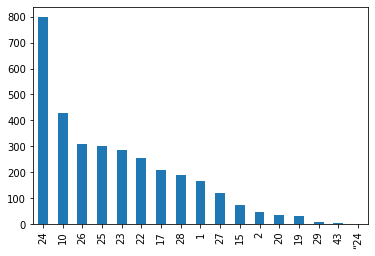

In [ ]:
youtube['category_id'].value_counts().plot(kind='bar')
     

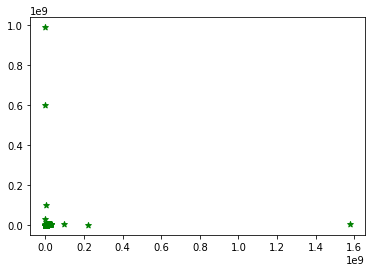

In [ ]:
plt.scatter(youtube['subscriber'], youtube['views'],marker="*", color="green")

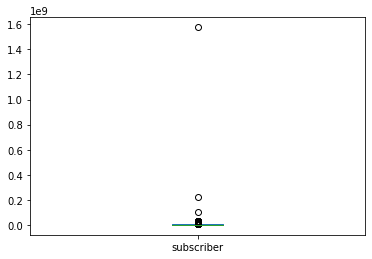

In [ ]:
youtube['subscriber'].plot(kind='box')

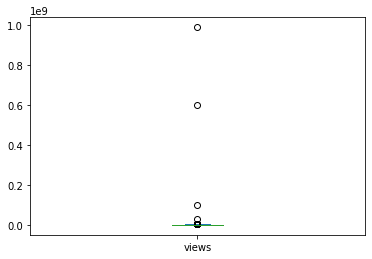

In [ ]:
youtube['views'].plot(kind='box')
     